In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tabulate as tb
import plotnine as p9
import warnings
warnings.filterwarnings('ignore')

In [2]:
#!pip install pandas_profiling

In [3]:
df = pd.read_csv(r'C:/Users/asus/Desktop/Surgical-deepnet.csv')

In [4]:
df.head()

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
0,19.31,59.2,1,1,0,0,0,0,0,0,...,-0.57,3,0,7.63,6,1,0,-0.43,1,0
1,18.73,59.1,0,0,0,0,0,0,0,0,...,0.21,0,0,12.93,0,1,0,-0.41,1,0
2,21.85,59.0,0,0,0,0,0,0,0,0,...,0.00,2,0,7.68,5,3,0,0.08,1,0
3,18.49,59.0,1,0,1,0,0,1,1,0,...,-0.65,2,1,7.58,4,3,0,-0.32,1,0
4,19.70,59.0,1,0,0,0,0,0,0,0,...,0.00,0,0,7.88,11,0,0,0.00,1,0


In [5]:
df.shape

(14635, 25)

In [6]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [7]:
df.columns[df.dtypes == 'object']

Index([], dtype='object')

In [8]:
df.columns

Index(['bmi', 'Age', 'asa_status', 'baseline_cancer', 'baseline_charlson',
       'baseline_cvd', 'baseline_dementia', 'baseline_diabetes',
       'baseline_digestive', 'baseline_osteoart', 'baseline_psych',
       'baseline_pulmonary', 'ahrq_ccs', 'ccsComplicationRate',
       'ccsMort30Rate', 'complication_rsi', 'dow', 'gender', 'hour', 'month',
       'moonphase', 'mort30', 'mortality_rsi', 'race', 'complication'],
      dtype='object')

In [9]:
num = df[['bmi', 'Age','baseline_charlson','ahrq_ccs', 'ccsComplicationRate',
       'ccsMort30Rate', 'complication_rsi', 'mortality_rsi']]
cat = df[['baseline_cancer','asa_status','baseline_cvd', 'baseline_dementia', 'baseline_diabetes',
       'baseline_digestive', 'baseline_osteoart', 'baseline_psych',
       'baseline_pulmonary','dow', 'gender', 'month',
       'moonphase', 'mort30', 'race',]]

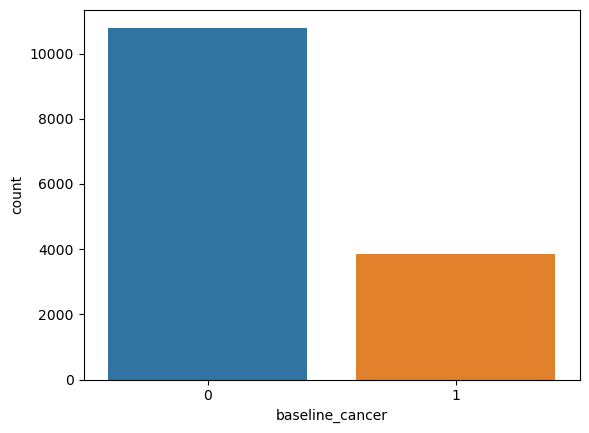

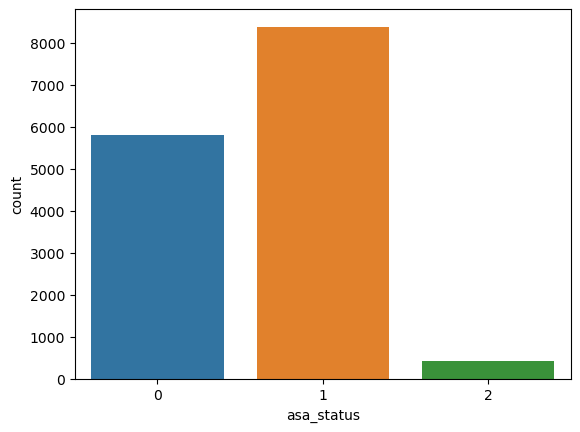

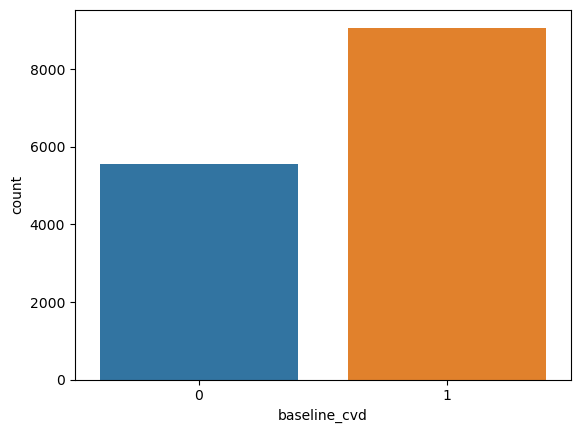

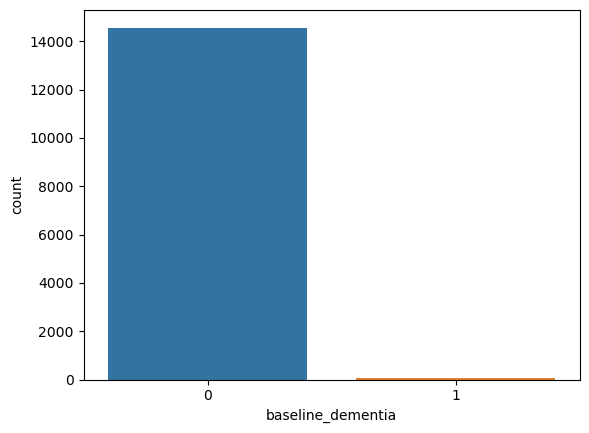

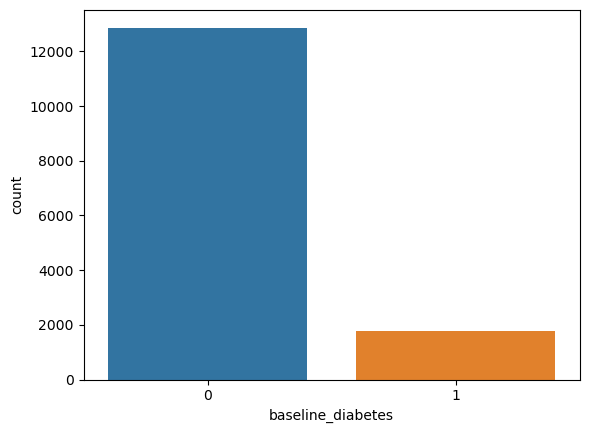

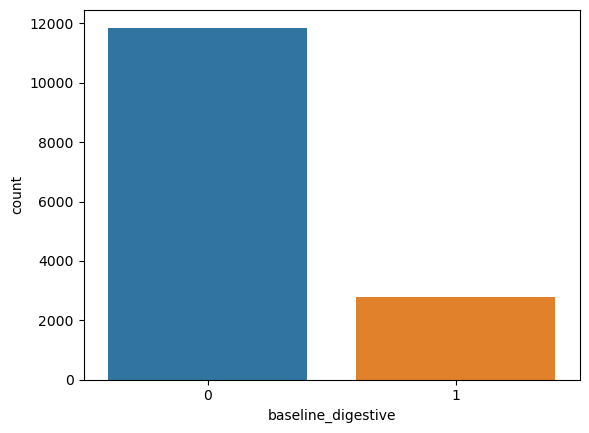

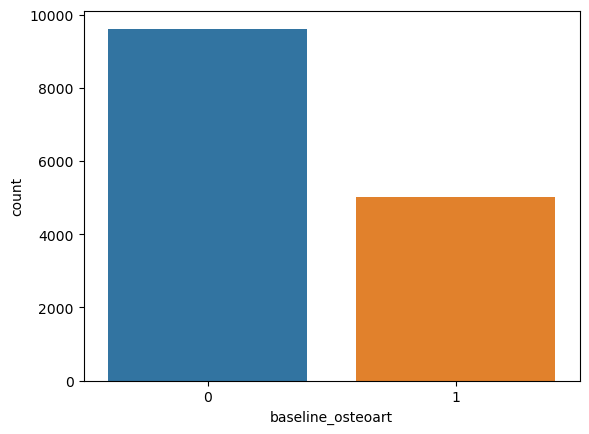

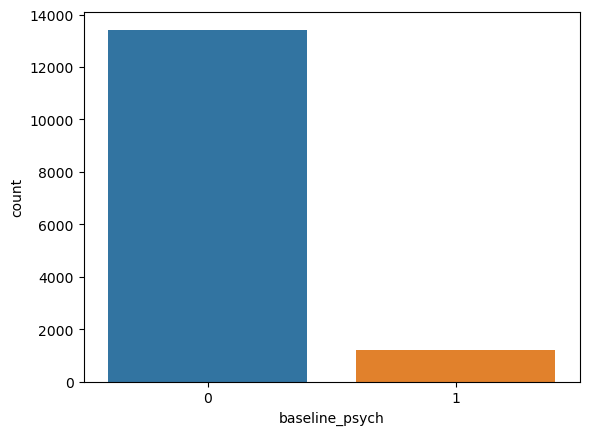

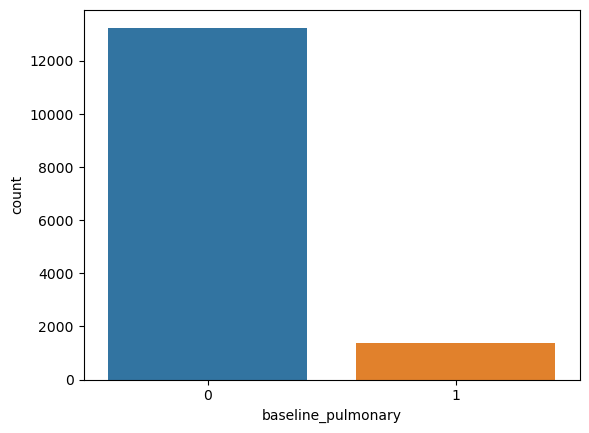

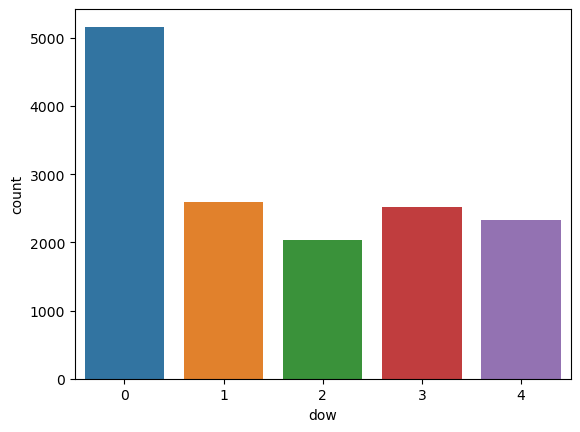

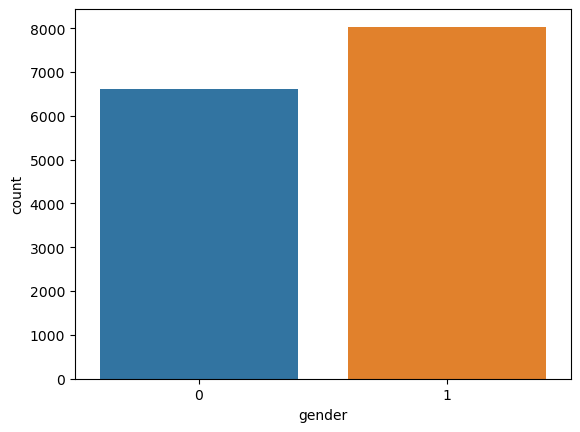

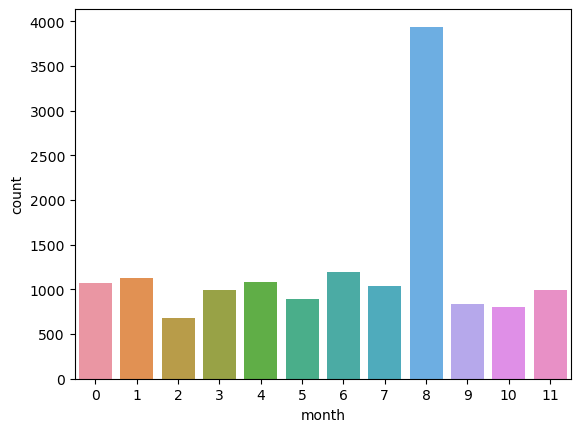

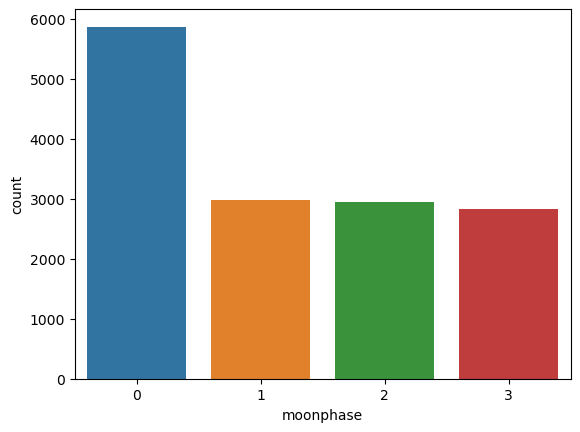

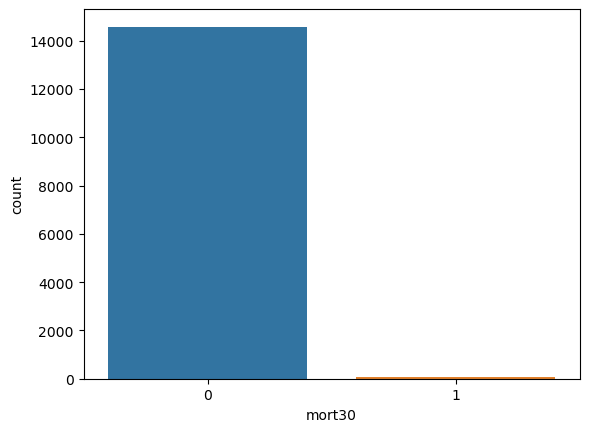

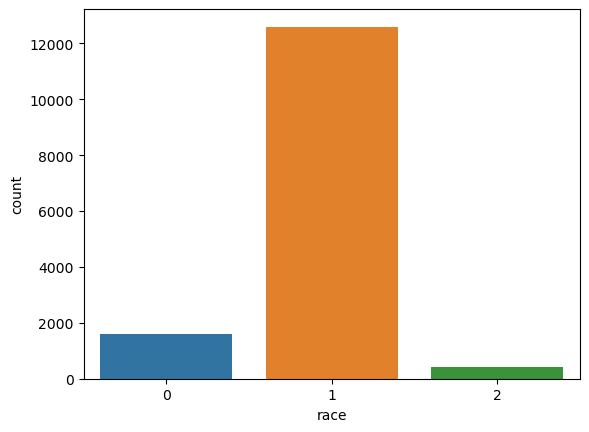

In [13]:
for i in cat:
    sns.countplot(x=i,data=cat)
    plt.show()

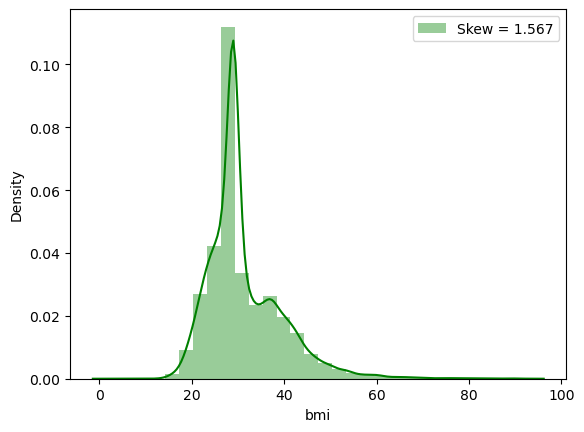

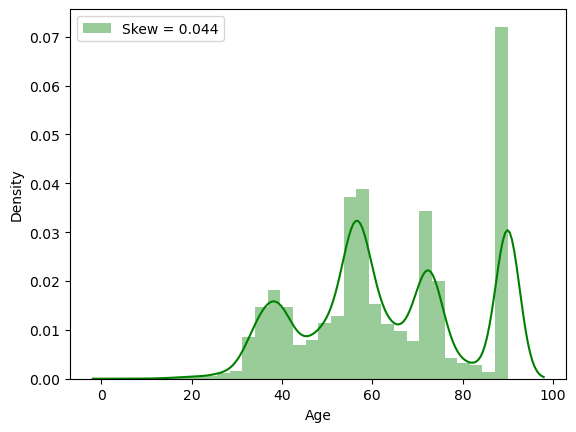

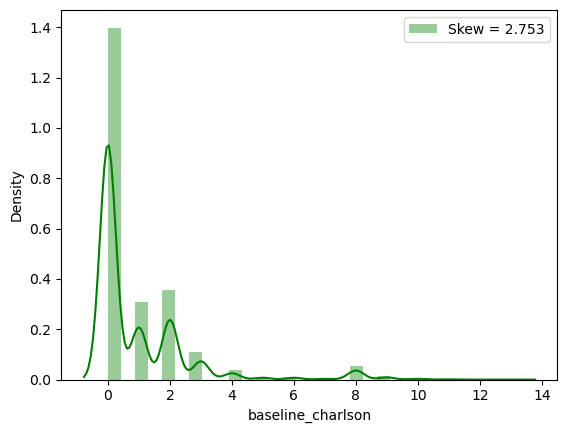

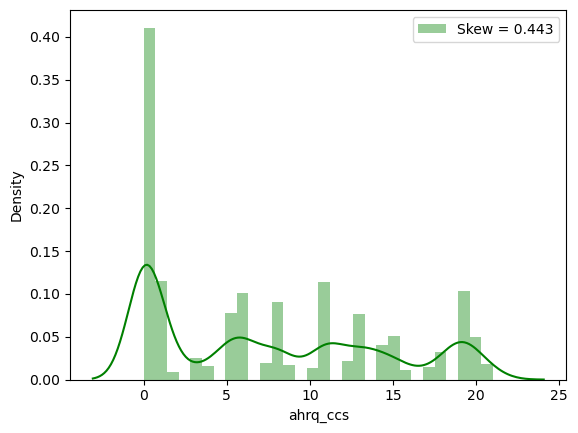

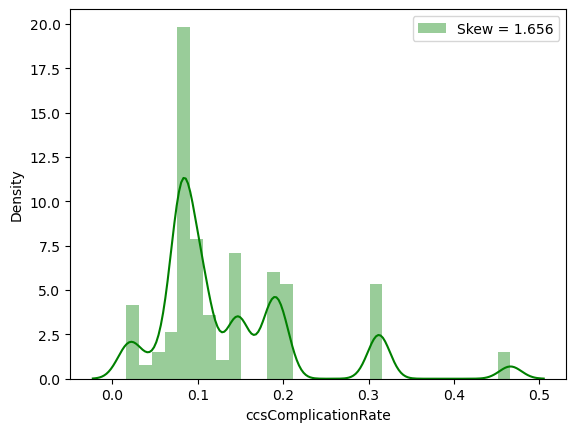

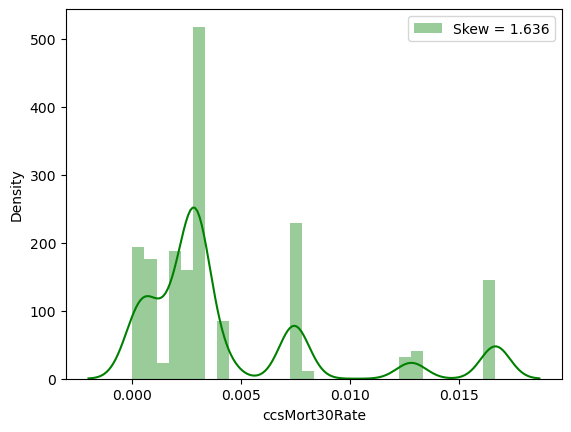

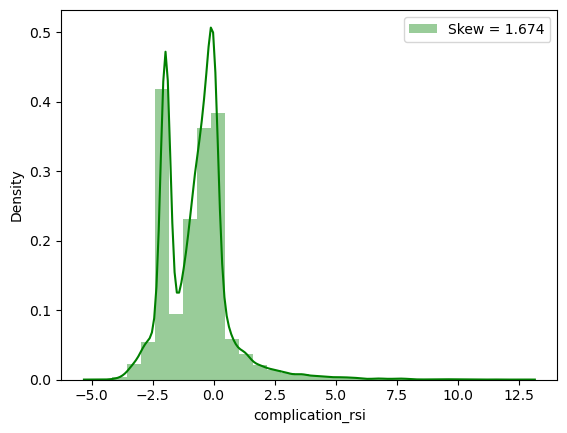

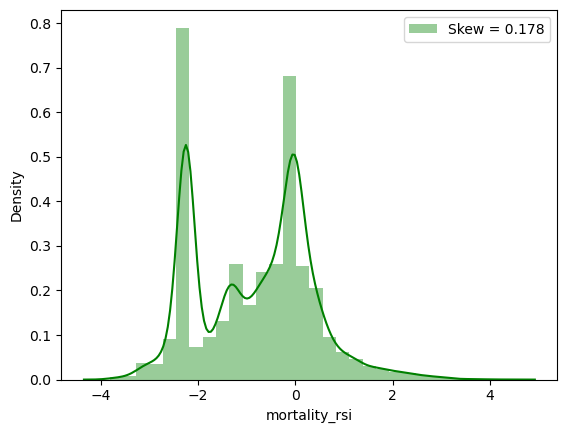

In [14]:

for i in num.columns:
    skew = num[i].skew()
    sns.distplot(num[i], kde= True, label='Skew = %.3f' %(skew), bins=30,color='green')
    plt.legend(loc='best')
    plt.show();

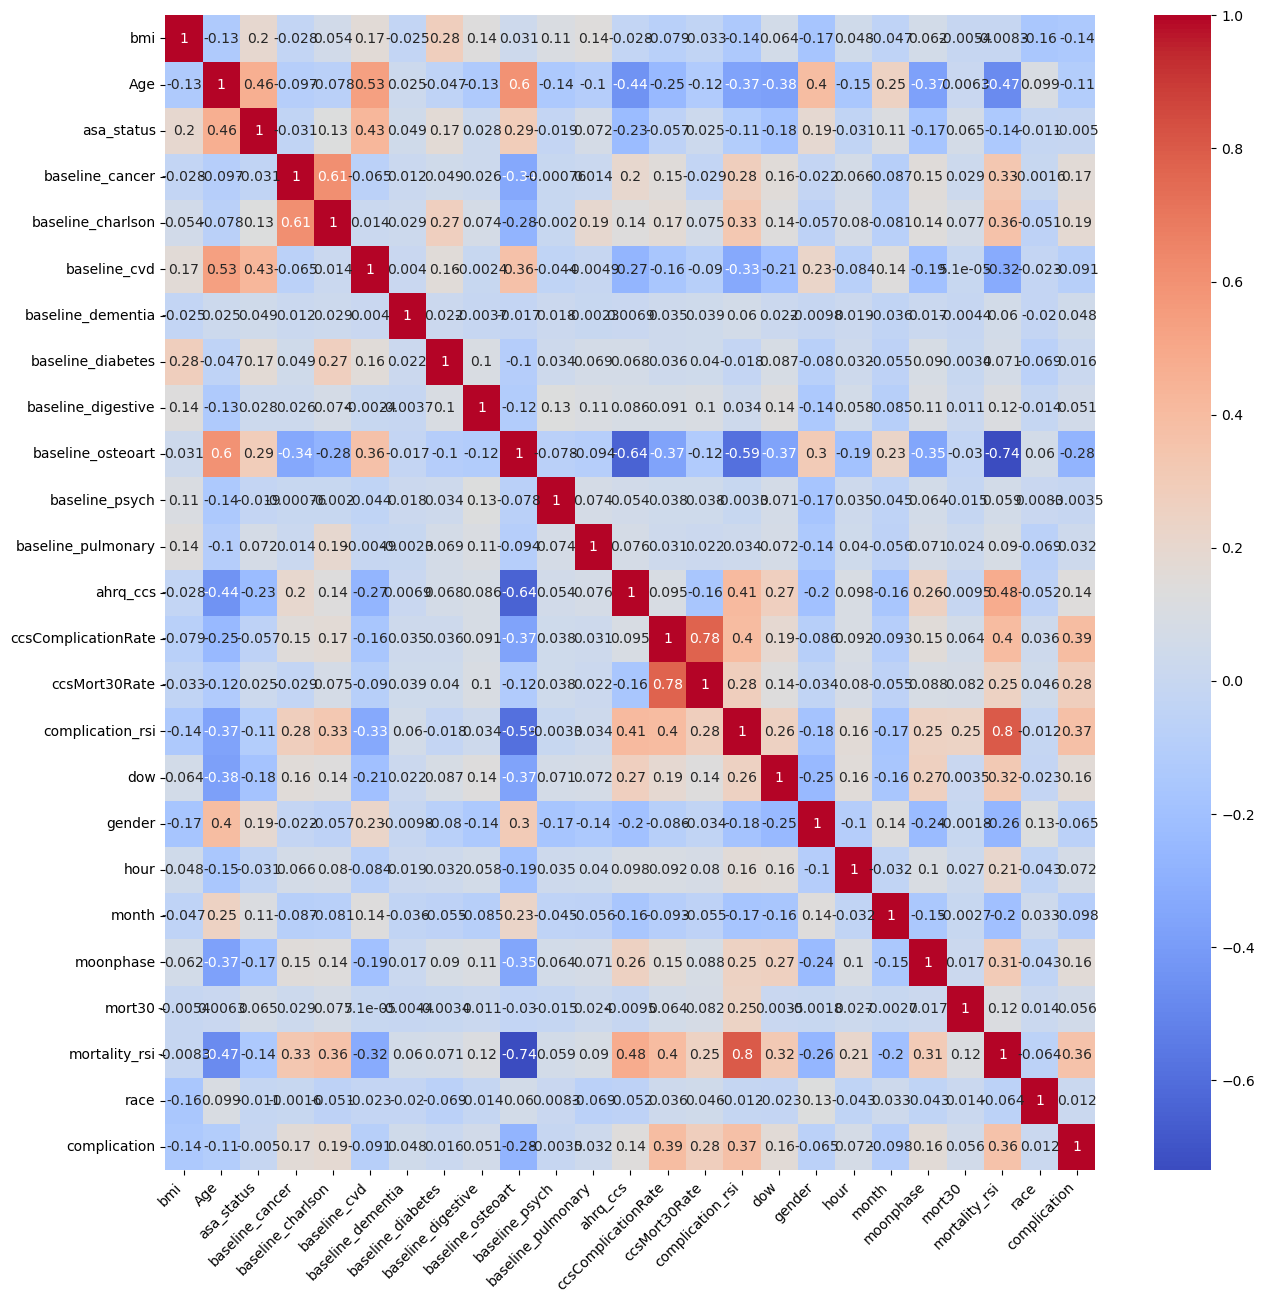

In [15]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), annot = True,cmap="coolwarm")
plt.xticks(rotation=45, ha="right");

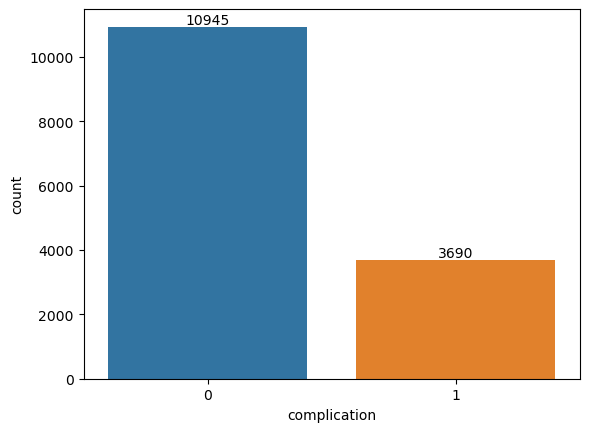

In [16]:
sns.countplot(x=df.complication,data=df)
for i, count in enumerate(np.bincount(df.complication)):
    plt.text(i, count+1, str(count), ha='center', va='bottom')

##### The graph shows that there is a significant difference in the number of instances between the two classes, which is commonly known as class imbalance. This can be problematic as the model may perform poorly on the underrepresented class. To address this issue, we can perform oversampling on the training data to balance the class distribution and improve the model's performance on both classes.

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
train ,test = train_test_split(df,test_size=.2)

In [19]:
trainx = train.iloc[:,0:-1]
trainy=train.iloc[:,-1]
testx = test.iloc[:,0:-1]
testy=test.iloc[:,-1]

In [20]:
trainy.value_counts()

0    8733
1    2975
Name: complication, dtype: int64

###### we will use SMOTE to perform oversampling

In [21]:
import imblearn
from imblearn.over_sampling import SMOTE

In [22]:
sm = SMOTE(sampling_strategy=1)

In [23]:
sm.fit(trainx,trainy)

SMOTE(sampling_strategy=1)

In [24]:
x_train,y_train = sm.fit_resample(trainx,trainy)

In [25]:
y_train.value_counts()

0    8733
1    8733
Name: complication, dtype: int64

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score

#### Hyperparameters tuning using GridsearchCV

In [18]:
dt = DecisionTreeClassifier()

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
search_dict = {'criterion':['gini','entropy'],
              'max_depth': range(3,10)}

In [21]:
grid = GridSearchCV(dt,param_grid= search_dict)

In [22]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 10)})

In [23]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=9)

# -------------------------------------------------------------------------------------------------------------

In [26]:
rfc = RandomForestClassifier()

In [27]:
search_dictRF = {'criterion':['gini','entropy'],
              'max_depth': range(3,10),
              'n_estimators': range(100,300,50)}

In [28]:
gridRF = GridSearchCV(rfc,param_grid= search_dictRF)

In [29]:
gridRF.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 10),
                         'n_estimators': range(100, 300, 50)})

In [30]:
p1 =gridRF.predict(testx)

In [31]:
gridRF.best_estimator_

RandomForestClassifier(max_depth=9, n_estimators=250)

# --------------------------------------------------------------------------------------------------------------

In [33]:
svc = SVC()

In [34]:
search_dictsvc = {'kernel':['rbf', 'sigmoid','linear']}

In [35]:
gridsvc = GridSearchCV(svc,param_grid= search_dictsvc)

In [36]:
gridsvc.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'kernel': ['rbf', 'sigmoid', 'linear']})

In [37]:
pred5 = gridsvc.predict(testx)

In [38]:
gridsvc.best_estimator_

SVC(kernel='linear')

# --------------------------------------------------------------------------------------------------------------

In [27]:

# Initialize the models
models = {'LogisticRegression': LogisticRegression(),
          'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=9),
          'RandomForestClassifier': RandomForestClassifier(max_depth=9, n_estimators=250),
          'GradientBoostingClassifier': GradientBoostingClassifier(),
          'XGBClassifier': XGBClassifier(),
          'KNNClassifier':KNeighborsClassifier(),
         'SVC':SVC(kernel='linear')}

# Initialize an empty dataframe to store the results
results_df = pd.DataFrame(columns=['Model', 'Confusion Matrix', 'Accuracy Score', 'Precision Score', 'Recall Score'])

# Loop through the models
for model_name, model in models.items():
    # Fit the model
    model.fit(x_train,y_train)

    # Make predictions on the test data
    y_pred = model.predict(testx)

    # Calculate the evaluation metrics
    cm = confusion_matrix(testy, y_pred)
    acc = accuracy_score(testy, y_pred)*100
    prec = precision_score(testy, y_pred)*100
    rec = recall_score(testy, y_pred)*100

    # Add the results to the dataframe
    results_df = results_df.append({'Model': model_name,
                                    'Confusion Matrix': cm,
                                    'Accuracy Score': acc,
                                    'Precision Score': prec,
                                    'Recall Score': rec}, ignore_index=True)

# Print the results
print(tb.tabulate(results_df.sort_values('Accuracy Score',ascending=False), headers = 'keys', tablefmt = 'fancy_grid'))


╒════╤════════════════════════════╤════════════════════╤══════════════════╤═══════════════════╤════════════════╕
│    │ Model                      │ Confusion Matrix   │   Accuracy Score │   Precision Score │   Recall Score │
╞════╪════════════════════════════╪════════════════════╪══════════════════╪═══════════════════╪════════════════╡
│  4 │ XGBClassifier              │ [[2084  128]       │          89.5114 │           80.7229 │        74.965  │
│    │                            │  [ 179  536]]      │                  │                   │                │
├────┼────────────────────────────┼────────────────────┼──────────────────┼───────────────────┼────────────────┤
│  3 │ GradientBoostingClassifier │ [[1988  224]       │          87.0516 │           71.4286 │        78.3217 │
│    │                            │  [ 155  560]]      │                  │                   │                │
├────┼────────────────────────────┼────────────────────┼──────────────────┼───────────────────┼─

##### From the above evaluation table, we can see that the XGBClassifier gives us the best results among all other models. Additionally, it has a high recall Score of around 73% & Precision Score of around 82%, indicating that we can target patients who may be at risk of experiencing complications during or after surgery.

In [28]:
dt = DecisionTreeClassifier(max_depth=5)

In [29]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [30]:
import pydotplus
import pydot
from IPython.display import Image 
from six import StringIO
from sklearn.tree import export_graphviz

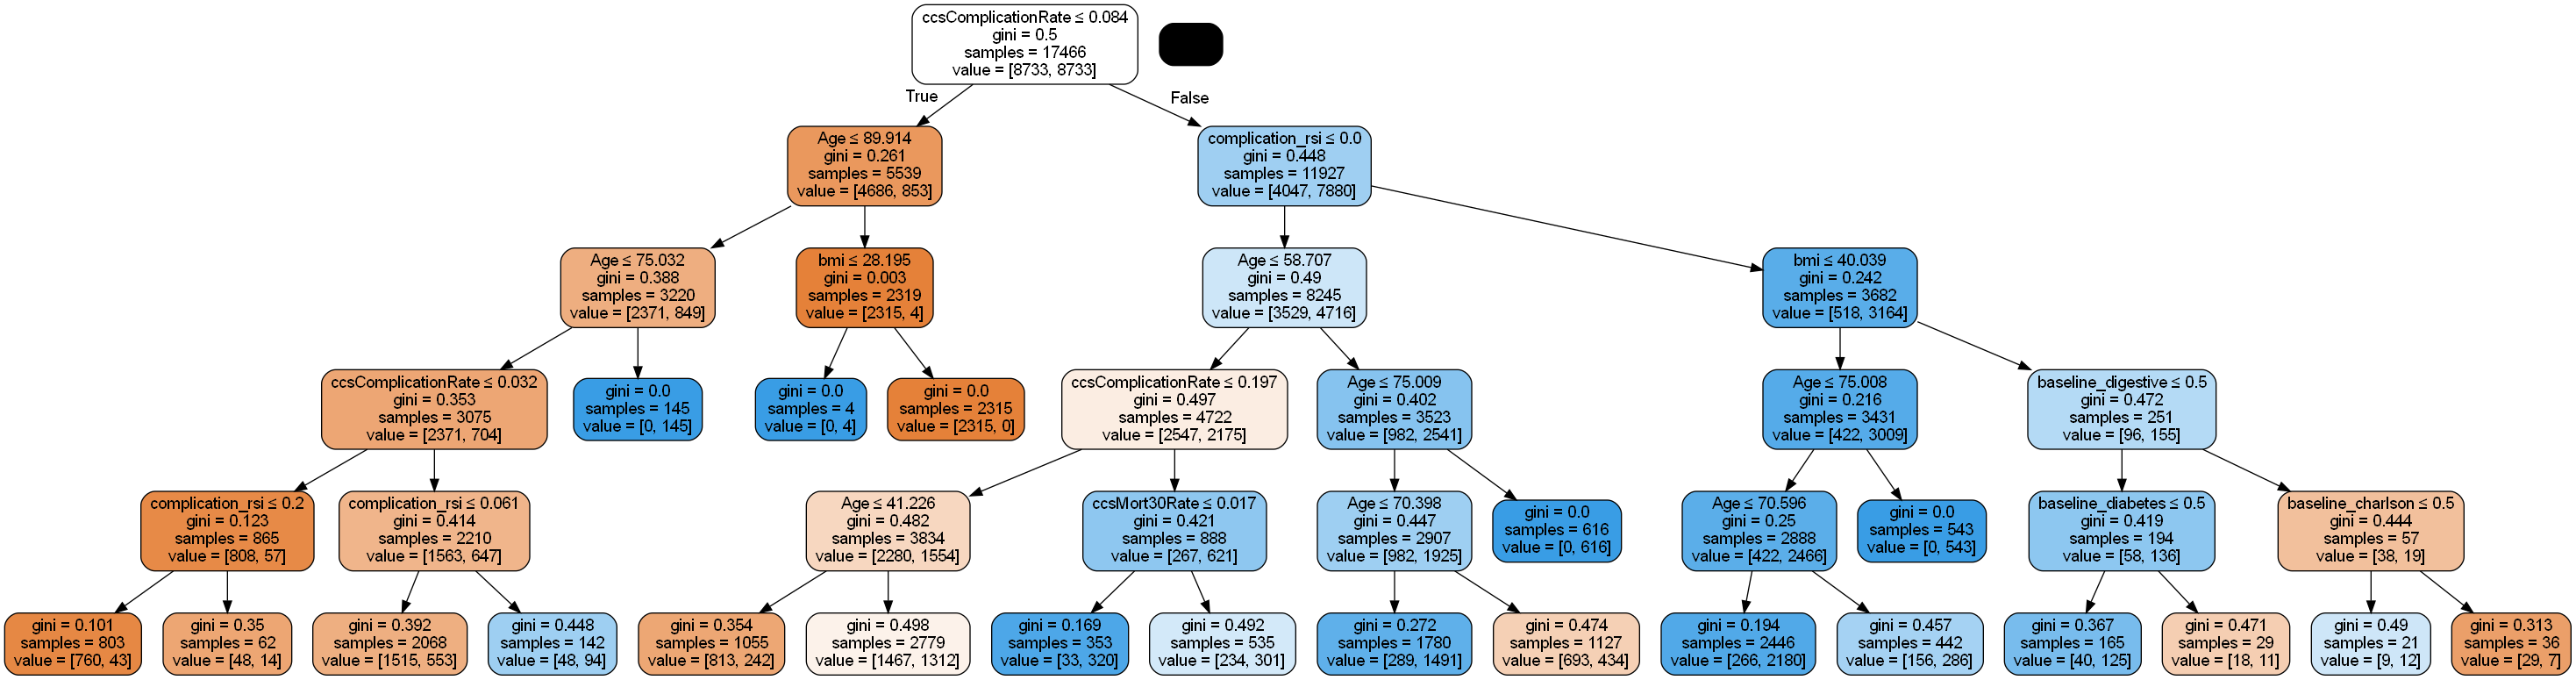

<Figure size 1800x1800 with 0 Axes>

In [31]:
dot_data = StringIO()  ## creating a empty  file 
fig= plt.figure(figsize=(18,18))

export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True , feature_names=x_train.columns  )
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [32]:
#tree for presentation

In [78]:
xgb = XGBClassifier()

In [79]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [80]:
xgb.feature_importances_

array([0.03052416, 0.07653189, 0.01304151, 0.04407434, 0.0098137 ,
       0.03002138, 0.00652483, 0.05918078, 0.04611105, 0.14460227,
       0.06092289, 0.03834431, 0.01811864, 0.222275  , 0.02574034,
       0.03660998, 0.01811407, 0.02505632, 0.01133554, 0.01186086,
       0.01709685, 0.01207006, 0.02254673, 0.01948256], dtype=float32)

In [81]:
imp_feature = pd.DataFrame()
imp_feature['features'] = x_train.columns
imp_feature['Score']= xgb.feature_importances_
imp_feature.sort_values('Score',ascending=False)

,features,Score
13,ccsComplicationRate,0.222275
9,baseline_osteoart,0.144602
1,Age,0.076532
10,baseline_psych,0.060923
7,baseline_diabetes,0.059181
8,baseline_digestive,0.046111
3,baseline_cancer,0.044074
11,baseline_pulmonary,0.038344
15,complication_rsi,0.036610
0,bmi,0.030524


In [83]:
sum_top_12 = imp_feature.sort_values('Score', ascending=False).head(12)['Score'].sum()
sum_top_12      #top 12 features are able to explain around 81% of total variance

0.81493837

In [98]:
l1 = list(imp_feature.sort_values('Score', ascending=False).head(12).features)
l1

['ccsComplicationRate',
 'baseline_osteoart',
 'Age',
 'baseline_psych',
 'baseline_diabetes',
 'baseline_digestive',
 'baseline_cancer',
 'baseline_pulmonary',
 'complication_rsi',
 'bmi',
 'baseline_cvd',
 'ccsMort30Rate']

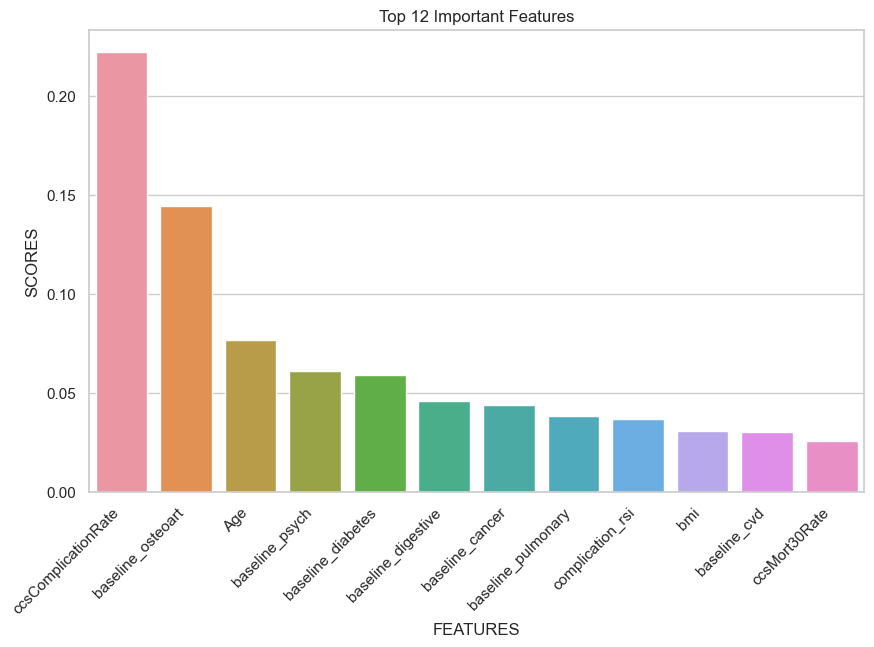

In [109]:
# Create a bar plot of the top 12 features and their scores
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(x="features", y="Score", data=imp_feature.sort_values('Score', ascending=False).head(12))
plt.xlabel('FEATURES')
plt.ylabel('SCORES')
plt.title('Top 12 Important Features')
plt.xticks(rotation=45, ha="right")
plt.show()


In [88]:
train_x = x_train.loc[:,l1]
test_x = testx.loc[:,l1]

In [92]:
xgb.fit(train_x,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [93]:
pre_ft = xgb.predict(test_x)

In [94]:
confusion_matrix(testy,pre_ft)

array([[2064,  111],
       [ 204,  548]], dtype=int64)

In [99]:
accuracy_score(testy,pre_ft)*100

89.23812777587973

In [100]:
precision_score(testy,pre_ft)*100

83.15629742033383

In [101]:
recall_score(testy,pre_ft)*100

72.87234042553192

##### You can simplify the analysis by focusing on the top 12 important features that are most predictive of the surgical complications. This will allow you to identify the key factors that you can address to reduce the likelihood of complications for patients undergoing surgery.



##### We can further investigate these features and identify strategies to mitigate the risks associated with them. By focusing on these important features, we can prioritize ourefforts to improve patient outcomes after surgery.